In [93]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scienceplots
import seaborn as sns
import GPy

plt.style.use('science')

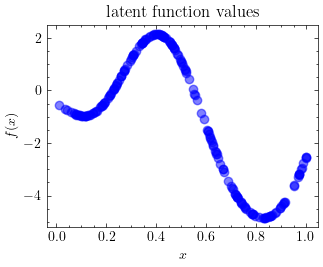

In [95]:
np.random.seed(150)

k = GPy.kern.RBF(1, variance=7., lengthscale=0.2)
X = np.random.rand(200,1)

#draw the latent function value
f = np.random.multivariate_normal(np.zeros(200), k.K(X))

plt.plot(X, f, 'bo', alpha=0.5)
plt.title('latent function values');plt.xlabel('$x$');plt.ylabel('$f(x)$')
plt.show()

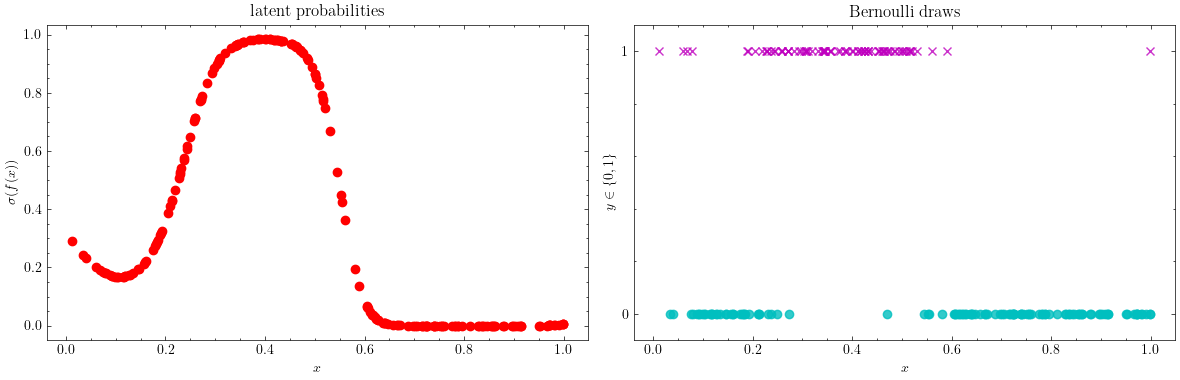

In [96]:
lik = GPy.likelihoods.Bernoulli()
p = lik.gp_link.transf(f) # squash the latent function

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(X, p, 'ro')
plt.title('latent probabilities');plt.xlabel('$x$');plt.ylabel('$\sigma(f(x))$')


plt.subplot(122)
Y = lik.samples(f).reshape(-1,1)
plt.plot(X[Y.flatten()==0], Y[Y.flatten()==0], 'co', alpha=0.8)
plt.plot(X[Y.flatten()==1], Y[Y.flatten()==1], 'mx', alpha=0.8)
plt.ylim(-0.1, 1.1)
plt.yticks([0,1])
plt.title('Bernoulli draws');plt.xlabel('$x$');plt.ylabel('$y \in \{0,1\}$')

plt.tight_layout()
plt.show()

## EP

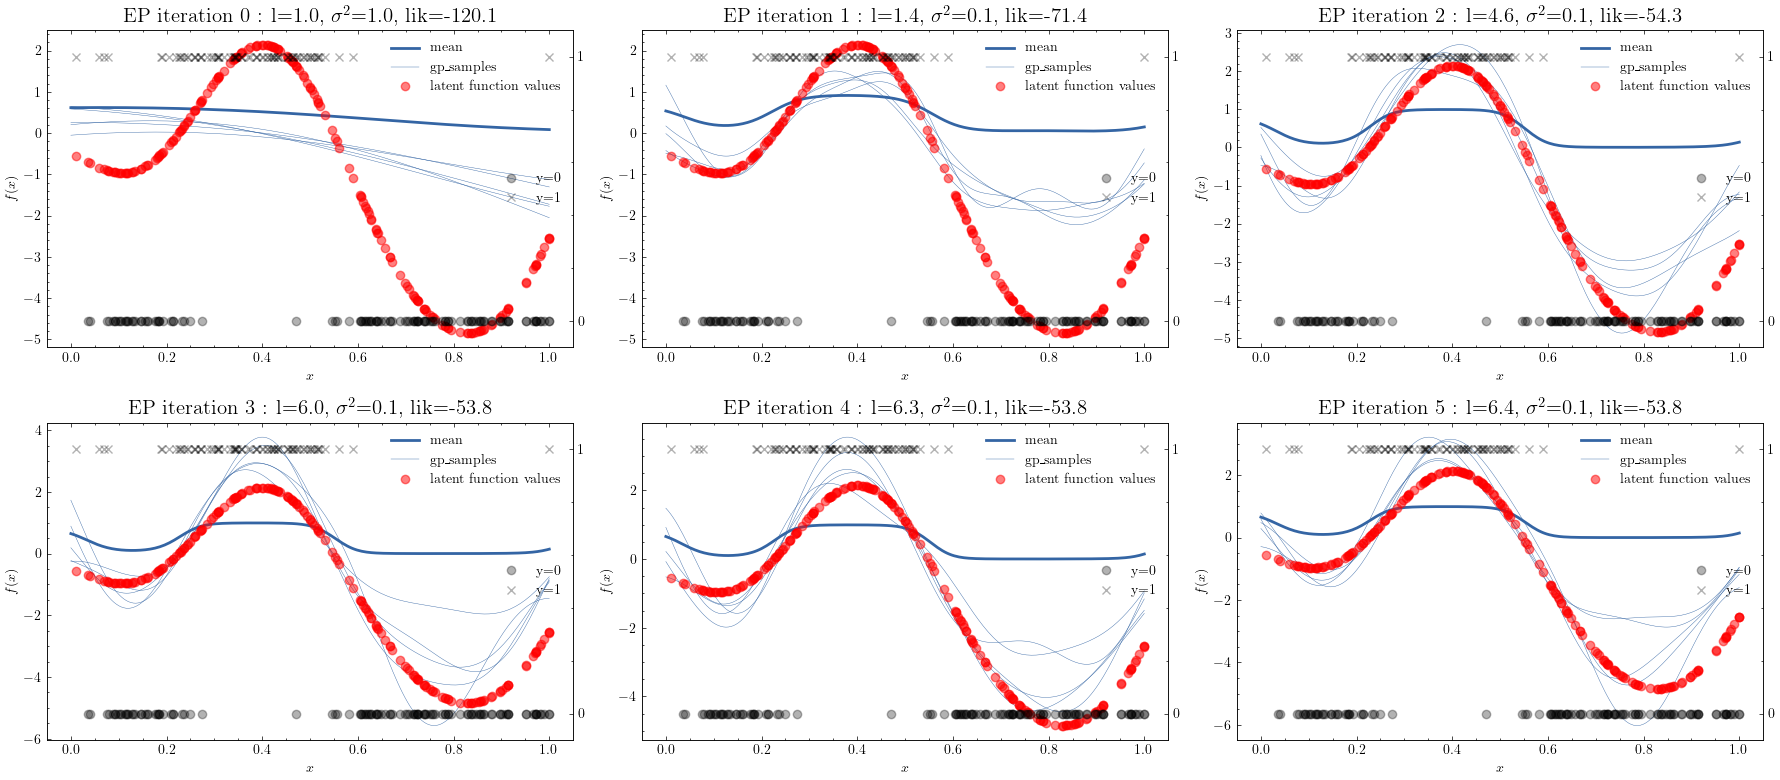

In [109]:
m = GPy.models.GPClassification(X, Y.reshape(-1,1))

fig, axes = plt.subplots(2, 3, figsize=(18,8))

for i in range(6):
    ax = axes.flatten()[i]
    ax2 = ax.twinx()
    m.plot_mean(ax=ax, plot_limits=[0,1], label='mean')
    m.plot_samples(ax=ax, plot_limits=[0,1], samples=5)
    ax.plot(X, f, 'ro', alpha=0.5, label = 'latent function values', lw=1.5)
    ax.set_title('EP iteration {} : l={:.1f}, $\sigma^2$={:.1f}, lik={:.1f}'.format(i+1, m.param_array[0], m.param_array[1], m.log_likelihood()), fontsize=15)
    ax.set_xlabel('$x$');ax.set_ylabel('$f(x)$')
    ax.legend()


    ax2.plot(X[Y.flatten()==0], Y[Y.flatten()==0], 'ko', alpha=0.3, label='y=0', lw=0.5)
    ax2.plot(X[Y.flatten()==1], Y[Y.flatten()==1], 'kx', alpha=0.3, label='y=1', lw=0.5)
    ax2.set_ylim(-0.1, 1.1)
    ax2.set_yticks([0,1])
    ax2.legend(loc='best')

    m.optimize('bfgs', max_iters=100)

plt.tight_layout()

plt.show()

## Laplace Approximation

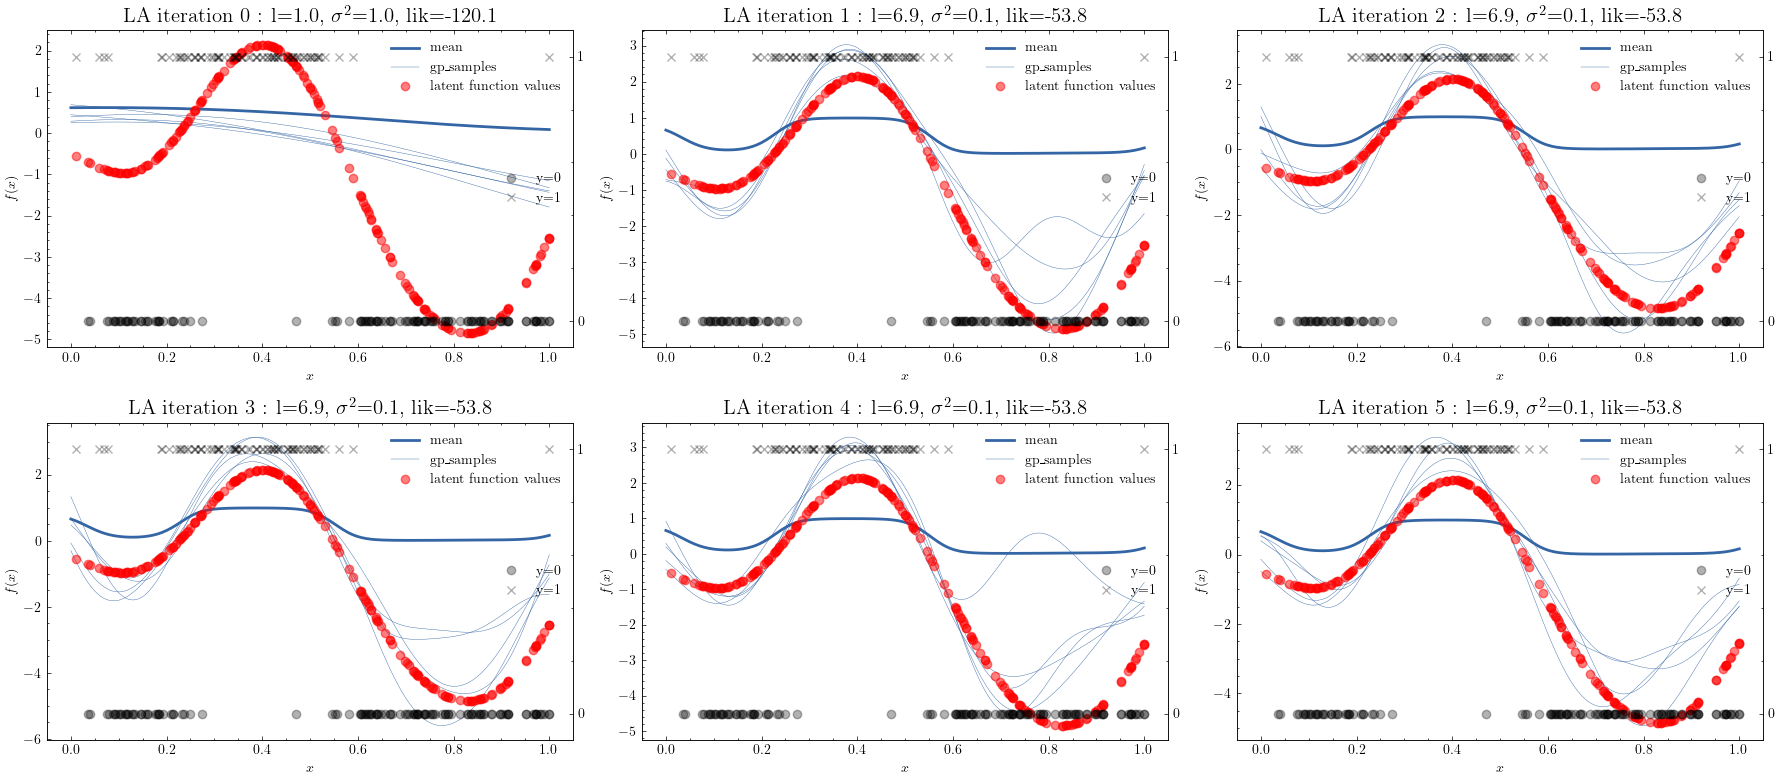

In [111]:
m = GPy.models.GPClassification(X, Y.reshape(-1,1), inference_method=GPy.inference.latent_function_inference.laplace.Laplace())

fig, axes = plt.subplots(2, 3, figsize=(18,8))

for i in range(6):
    ax = axes.flatten()[i]
    ax2 = ax.twinx()
    m.plot_mean(ax=ax, plot_limits=[0,1], label='mean')
    m.plot_samples(ax=ax, plot_limits=[0,1], samples=5)
    ax.plot(X, f, 'ro', alpha=0.5, label = 'latent function values', lw=1.5)
    ax.set_title('LA iteration {} : l={:.1f}, $\sigma^2$={:.1f}, lik={:.1f}'.format(i+1, m.param_array[0], m.param_array[1], m.log_likelihood()), fontsize=15)
    ax.set_xlabel('$x$');ax.set_ylabel('$f(x)$')
    ax.legend()


    ax2.plot(X[Y.flatten()==0], Y[Y.flatten()==0], 'ko', alpha=0.3, label='y=0', lw=0.5)
    ax2.plot(X[Y.flatten()==1], Y[Y.flatten()==1], 'kx', alpha=0.3, label='y=1', lw=0.5)
    ax2.set_ylim(-0.1, 1.1)
    ax2.set_yticks([0,1])
    ax2.legend(loc='best')

    m.optimize('bfgs', max_iters=100)

plt.tight_layout()

plt.show()